# Analysis of Experiments with integer number.m

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from TestFunctions import GetBestPlacesFigure, GetSimpleStatistics, PlotStepsVsEpisodes,PlotMultipleExperiments,totaltime
import snakeviz
import cProfile
%load_ext snakeviz

The snakeviz extension is already loaded. To reload it, use:
  %reload_ext snakeviz


In [3]:
experiements = pd.read_csv('Final.csv')
#experiements[experiements['ID'] in [7,8]]
#experiements.query('ID in []')
#experiements.query('ID in [3,43,15,48]')
#experiements.query('ID in [3,7,13,15,27,31,43,48,51,52,56]')
#experiements.tau.unique()
#experiements.query('ID in [7]')
experiements.query('ID in [81,82,83,84,85,88]')
#experiements

,ID,layers,tau,optimizer,advantage,max_timesteps,gym_record,activation,batch_size,episodes,exploration,gamma,hidden_size,train_repeat,display,min_train,batch_norm,Rewardscheme,Details
75,81,1,0.010,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-10.0, 1000.0, -100.0]",Vision 90
76,82,1,0.010,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-10.0, 1000.0, -1000.0]",Vision 90
77,83,1,0.010,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-1.0, 1.0, -0.1]",Vision 90
78,84,1,0.001,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-1.0, 1.0, -0.1]",Vision 90
79,85,1,0.100,adam,avg,1000,None,relu,10,1000,0.1,0.99,100,10,True,10,False,"[-1.0, 1.0, -0.1]",Vision 90
80,88,1,0.010,adam,avg,1000,None,relu,10,200,0.1,0.99,100,10,True,10,False,"[-1.0, 1.0, -0.1]",NaN


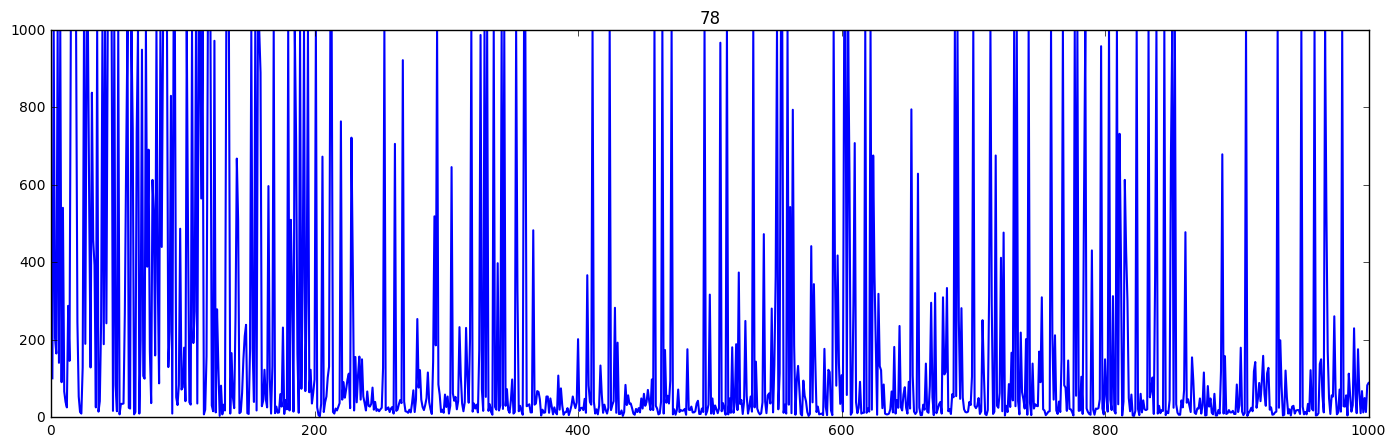

In [6]:
plt.figure(figsize=(17,5))
PlotStepsVsEpisodes(78,None,WithRandomWalk=False,withaxis=False,standalone=True)

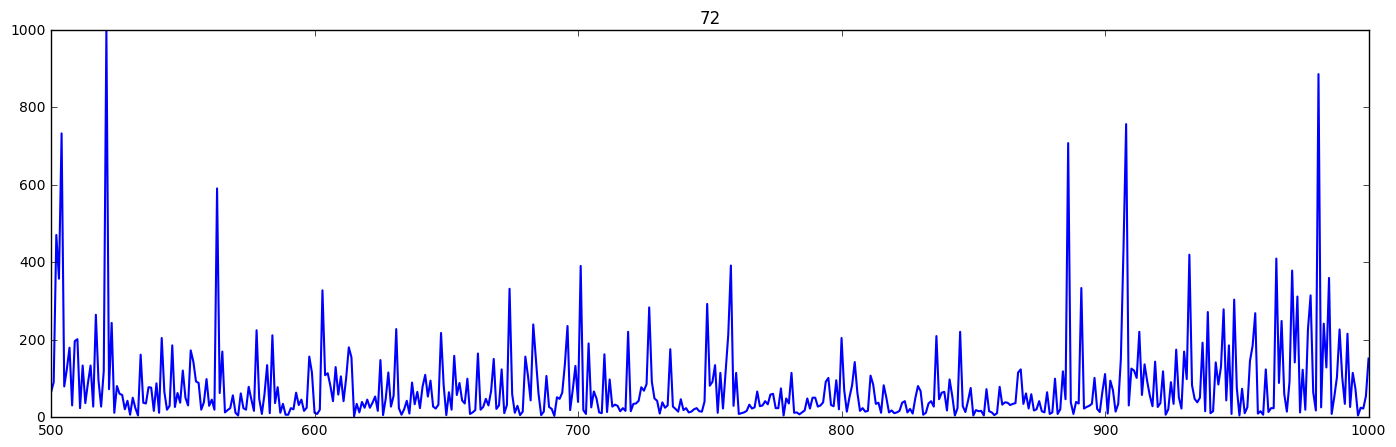

In [6]:
plt.figure(figsize=(17,5))
PlotStepsVsEpisodes(72,None,WithRandomWalk=False,withaxis=False,standalone=True,xlim=(500,1000))

<module 'matplotlib.pyplot' from '/home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

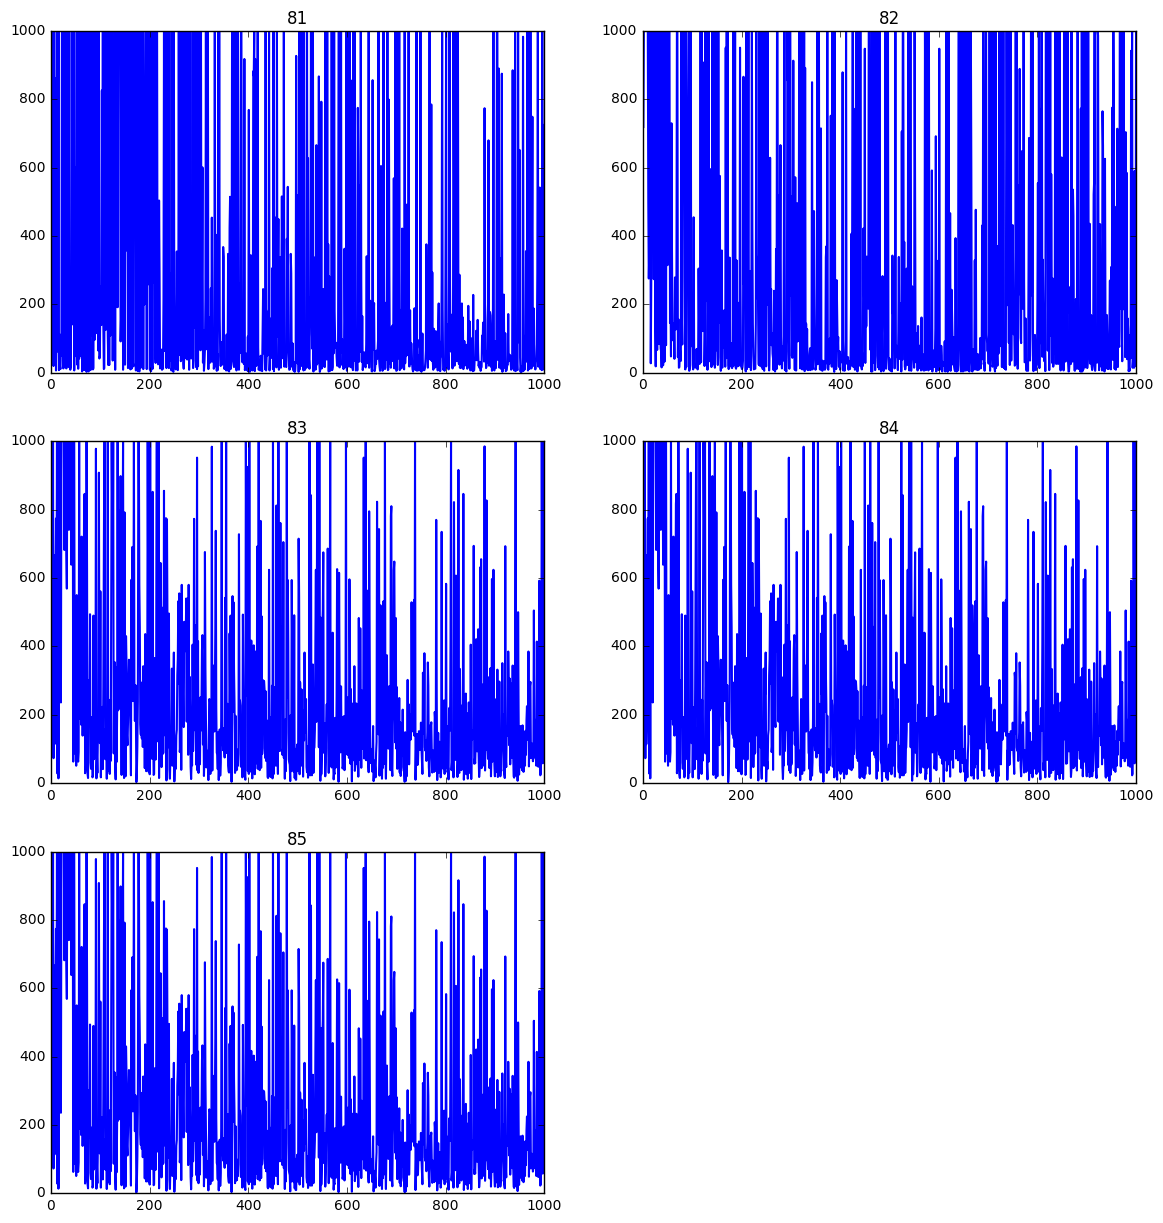

In [5]:
PlotMultipleExperiments([81,82,83,84,85],Plts_onX=2,WithRandomWalk=False)

### Total Time For Experiment

In [ ]:
output = totaltime([58,62,63,65])
for o in output:
    print o,output[o]

# Simple Statistics

In [5]:
GetSimpleStatistics('72')

,Episode,Steps,Reward,Time,RWsteps,RWPD,AIPD
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,154.096000,-14.461600,275.170038,381.286000,0.001407,0.001583
median,500.500000,51.000000,-4.100000,114.984662,284.500000,0.001151,0.001331
std,288.819436,250.660331,25.242059,426.032671,308.162711,0.001227,0.001414
min,1.000000,3.000000,-100.000000,2.048530,5.000000,0.000077,0.000000
25%,250.750000,23.000000,-13.225000,44.941726,127.750000,0.000604,0.000459
50%,500.500000,51.000000,-4.100000,114.984662,284.500000,0.001151,0.001331
75%,750.250000,142.250000,-1.300000,308.449526,577.500000,0.001687,0.002173
max,1000.000000,1000.000000,0.700000,2906.498168,1001.000000,0.008254,0.008132


# Experiment Best Places analysis

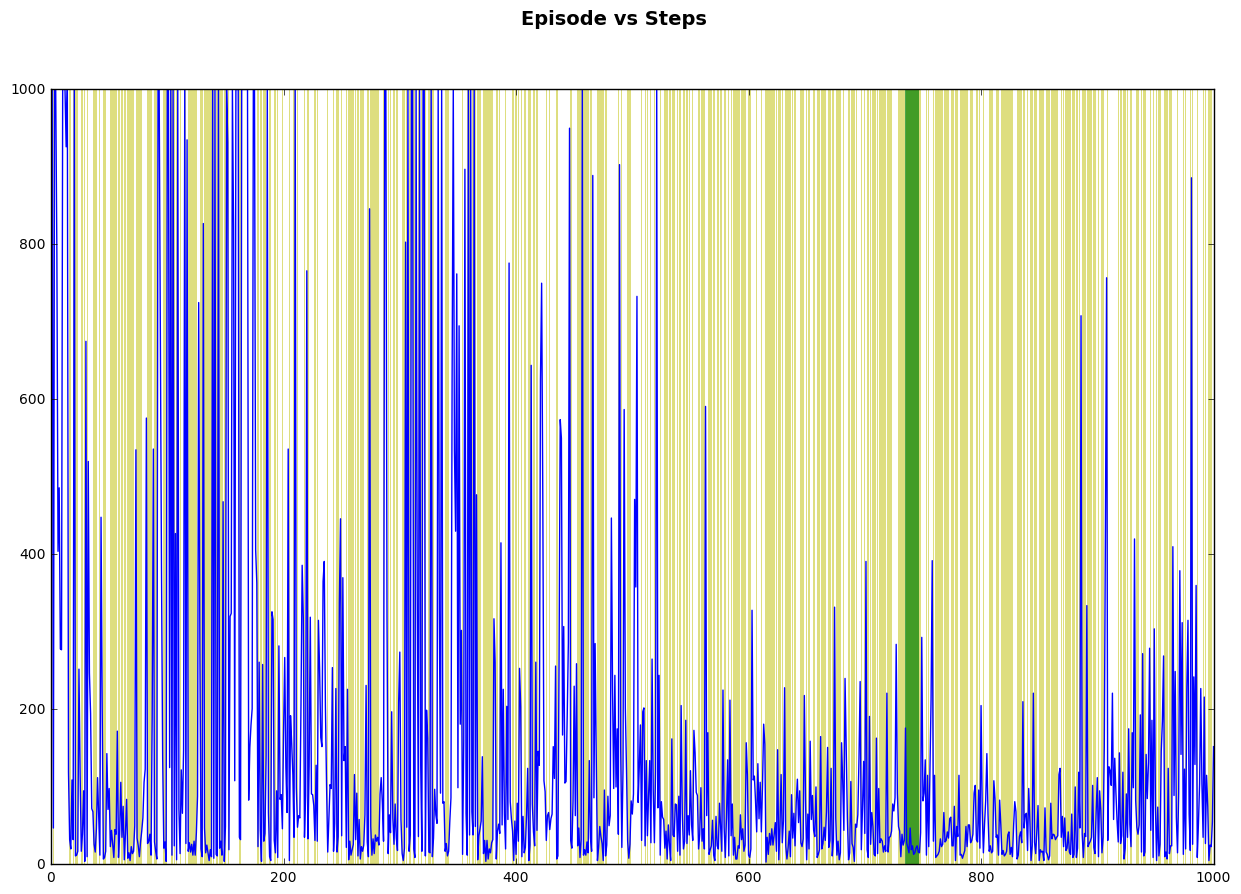

In [2]:
GetBestPlacesFigure('72',50)

# Time Consumption

In [ ]:
df.plot.line('Episode','Time',figsize=(15,10),)
plt.axvspan(200,281,color='r',alpha=0.5,lw=0)

In [ ]:
df[df.columns[[5,6]]].plot(figsize=(15,10),title='Time vs Reward (Normalized)',logy=True,lw=2.0)

In [19]:
totaltime([72,78,79,80])

{'72': 275170.03843425633,
 '78': 451999.02805184701,
 '79': 509503.53600891586,
 '80': 463078.48766594368}

In [10]:
dff.head()

,Episode,Steps,Reward,Time,RWsteps,RWPD,AIPD,type
0,1,727,-71.7,31.185894,157,0.001666,0.000490,train
1,1,1000,-100.0,2.212372,176,0.000000,0.000000,Test
2,2,545,-53.5,29.484629,247,0.001229,0.000657,train
3,2,1000,-100.0,1.789815,403,0.000000,0.000000,Test
4,3,1000,-100.0,64.736518,86,0.003151,0.000104,train


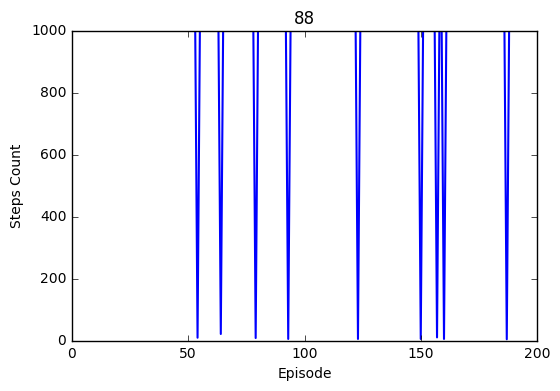

In [13]:
ax = plt.subplot(1,1,1)
dff = pd.read_csv('{}/exp_details.csv'.format(88),header=None)#,delimiter=',')
dff.columns = ['Episode','Steps','Reward','Time','RWsteps','RWPD','AIPD','type']
df = dff[dff.type=='Test']
ax.plot(df.Episode,df.Steps,color='b',lw=1.5)
ax.set_xlabel('Episode')
ax.set_ylabel('Steps Count')
ax.set_title('{}'.format(88))


# Performance Check

In [1]:
import pstats
p = pstats.Stats('../program_hpc_100.prof')
p.sort_stats('tottime')
p.print_stats(10)

Wed Dec 21 10:45:28 2016    ../program_hpc_100.prof

         884626103 function calls (878210950 primitive calls) in 58080.068 seconds

   Ordered by: internal time
   List reduced from 6663 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
 13161463 49688.927    0.004 49688.927    0.004 {numpy.core.multiarray.array}
  7096957 4890.269    0.001 5312.256    0.001 /home/hpc_aqeel/miniconda3/envs/py2/lib/python2.7/site-packages/theano/compile/function_module.py:754(__call__)
        1 1017.561 1017.561 58080.105 58080.105 duel.py:1(<module>)
 77670076  452.820    0.000  452.820    0.000 {method 'reduce' of 'numpy.ufunc' objects}
8042889/1971400  181.281    0.000  378.942    0.000 FOV_Calculator.py:57(_cast_light)
 76890757  152.005    0.000  632.690    0.000 /home/hpc_aqeel/miniconda3/envs/py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2200(amax)
 37603591  141.247    0.000  141.247    0.000 FOV_Calculator.py:31(blocked)
  6

<pstats.Stats instance at 0x7fe91c1ee950>

In [1]:
import pstats
p = pstats.Stats('../program_5.prof')
p.sort_stats('tottime')
p.print_stats(10)

Tue Dec 20 17:22:58 2016    ../program_5.prof

         142027739 function calls (141626717 primitive calls) in 589.548 seconds

   Ordered by: internal time
   List reduced from 7121 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   360983  221.413    0.001  221.413    0.001 {built-in method tensorflow.python._pywrap_tensorflow.TF_Run}
   694108   91.382    0.000   91.382    0.000 {built-in method numpy.core.multiarray.array}
        1   33.664   33.664  589.878  589.878 ../testcprofile/duel.py:1(<module>)
   360983   18.569    0.000  380.305    0.001 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:563(_run)
  2960754   11.573    0.000   11.574    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   360983   10.840    0.000   37.382    0.000 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:510(_process_fetches)
23667210/23667208    9.915  

In [3]:
p = pstats.Stats('../program_5_no_DP.prof')
p.sort_stats('tottime')
p.print_stats(10)

Tue Dec 20 17:22:58 2016    ../program_5.prof

         142027739 function calls (141626717 primitive calls) in 589.548 seconds

   Ordered by: internal time
   List reduced from 7121 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   360983  221.413    0.001  221.413    0.001 {built-in method tensorflow.python._pywrap_tensorflow.TF_Run}
   694108   91.382    0.000   91.382    0.000 {built-in method numpy.core.multiarray.array}
        1   33.664   33.664  589.878  589.878 ../testcprofile/duel.py:1(<module>)
   360983   18.569    0.000  380.305    0.001 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:563(_run)
  2960754   11.573    0.000   11.574    0.000 {method 'reduce' of 'numpy.ufunc' objects}
   360983   10.840    0.000   37.382    0.000 /home/aqeel/anaconda2/envs/py3/lib/python3.5/site-packages/tensorflow/python/client/session.py:510(_process_fetches)
23667210/23667208    9.915  